# K-Means Clustering Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the dataset to cluster
For demonstration purposes we will generate random 2D points. Our data will more usually be multidimensional, but 2D datapoints are convenient for demonstration because we can easily visualize them.

We will use NumPy to generate the data. Setting a seed value ensures that the same dataset will be generated each time we run the notebook. This is useful as it means we'll get reproducible results. There's no special reason for choosing 42 as the random seed, but it's a choice you'll often see. It's a reference to the Hitchhiker's Guide to the Galaxy series where 42 is the answer to life, the universe and everything.

In [2]:
np.random.seed(42)

In [3]:
# Ensure that the data will have two obvious clusters
set_1 = np.random.randn(50, 2) + np.array([5, 5])
set_2 = np.random.randn(50, 2) + np.array([10, 10])

# Stack the sets into a single dataset
data = np.vstack([set_1, set_2])

In [4]:
data

array([[ 5.49671415,  4.8617357 ],
       [ 5.64768854,  6.52302986],
       [ 4.76584663,  4.76586304],
       [ 6.57921282,  5.76743473],
       [ 4.53052561,  5.54256004],
       [ 4.53658231,  4.53427025],
       [ 5.24196227,  3.08671976],
       [ 3.27508217,  4.43771247],
       [ 3.98716888,  5.31424733],
       [ 4.09197592,  3.5876963 ],
       [ 6.46564877,  4.7742237 ],
       [ 5.0675282 ,  3.57525181],
       [ 4.45561728,  5.11092259],
       [ 3.84900642,  5.37569802],
       [ 4.39936131,  4.70830625],
       [ 4.39829339,  6.85227818],
       [ 4.98650278,  3.94228907],
       [ 5.82254491,  3.77915635],
       [ 5.2088636 ,  3.04032988],
       [ 3.67181395,  5.19686124],
       [ 5.73846658,  5.17136828],
       [ 4.88435172,  4.6988963 ],
       [ 3.52147801,  4.28015579],
       [ 4.53936123,  6.05712223],
       [ 5.34361829,  3.23695984],
       [ 5.32408397,  4.61491772],
       [ 4.323078  ,  5.61167629],
       [ 6.03099952,  5.93128012],
       [ 4.16078248,

### Show our data on a scatterplot
Here we use Seaborn to visualize our dataset. Seaborn is built on Matplotlib, so we can use plt.title to set the title of our chart.

Text(0.5, 1.0, 'Data Before Clustering')

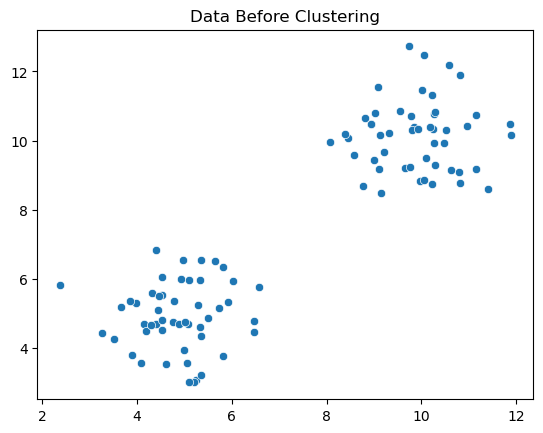

In [5]:
sns.scatterplot(x=data[:, 0],  # data[:, 0] selects all the x-coordinates in data
                y=data[:, 1])  # data[:, 1] selects all the y-coordinates in data
plt.title('Data Before Clustering')

## Select Initial Centroids

To begin the process of clustering, we must first choose how many clusters we want, and then pick that number of points from our dataset to be the initial centroids of our of clusters.  

In [6]:
NUMBER_OF_CLUSTERS = 3
initial_centroids = data[:NUMBER_OF_CLUSTERS]

In [7]:
initial_centroids

array([[5.49671415, 4.8617357 ],
       [5.64768854, 6.52302986],
       [4.76584663, 4.76586304]])

Usually the initial centroids are chosen randomly, which we could do as follows:<br>
initial_centroids = data[np.random.choice(data.shape[0], NUMBER_OF_CLUSTERS, replace=False), :]<br><br>
See the associated numpy-notes.ipynb which explains this step by step.

### Show points on a scatterplot with the initial centroids
Now we use the Seaborn scatterplot function to add the data points to the visualization, and the Matplotlib scatter function to add the centroids.

Text(0.5, 1.0, 'Data Before Clustering with Initial Centroids')

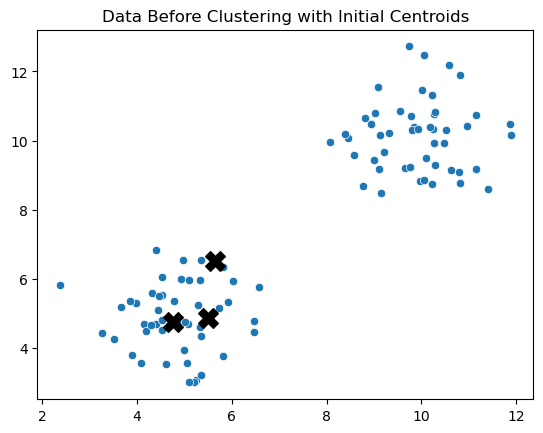

In [8]:
sns.scatterplot(x=data[:, 0],
                y=data[:, 1])
plt.scatter(x=initial_centroids[:, 0],
            y=initial_centroids[:, 1],
            s=200,
            c='black',
            marker='X')
plt.title('Data Before Clustering with Initial Centroids')

## Assign Points to the Nearest Centroid
See the associated numpy-notes.ipynb for more details on how NumPy is used in the code cell below.

In [9]:
def euclidean_distances(data, centroids):
    # Use Pythagoras' theorem to calculate the distances from each datapoint to each centroid
    return np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))


def assign_clusters(data, centroids):
    distances = euclidean_distances(data, centroids)
    return np.argmin(distances, axis=0)

In [10]:
initial_assignments = assign_clusters(data, initial_centroids)

In [11]:
initial_assignments

array([0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2,
       2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Visualize the initial assignment of points

Text(0.5, 1.0, 'Initial Clusters with Centroids')

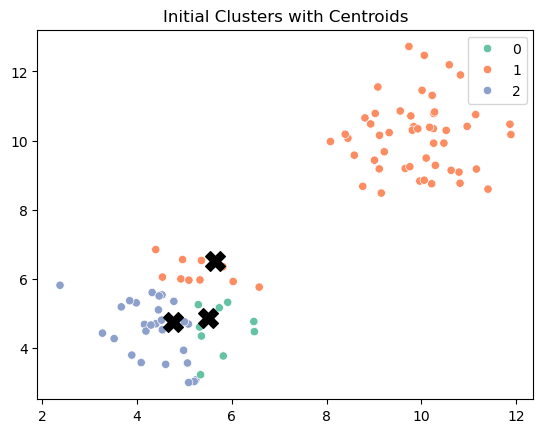

In [12]:
sns.scatterplot(x=data[:, 0],
                y=data[:, 1],
                hue=initial_assignments,
                palette='Set2')
plt.scatter(initial_centroids[:, 0],
            initial_centroids[:, 1],
            s=200, c='black',
            marker='X')
plt.title('Initial Clusters with Centroids')

## Update the Centroids
Given the points currently assigned to a centroid, we will calculate the mean x and y, and then use those as the new x and y coordinate for the centroid. In our example we're using two dimensions because it's easy to visualize, but we can use a similar process for multidimensional data. 

In [13]:
def update_centroids(data, assignments, n_clusters):
    # Update centroids based on current assignments
    new_centroids = [data[assignments == k].mean(axis=0) for k in range(n_clusters)]
    return np.array(new_centroids)

In [14]:
updated_centroids = update_centroids(data, initial_assignments, NUMBER_OF_CLUSTERS)

In [15]:
updated_centroids

array([[5.72421291, 4.5864778 ],
       [9.0806121 , 9.43509657],
       [4.38910716, 4.55160564]])

## Reassign Points to Clusters

In [16]:
updated_assignments = assign_clusters(data, updated_centroids)

In [17]:
updated_assignments

array([0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Visualize the Updated Clustering

Text(0.5, 1.0, 'Updated Clusters with New Centroids')

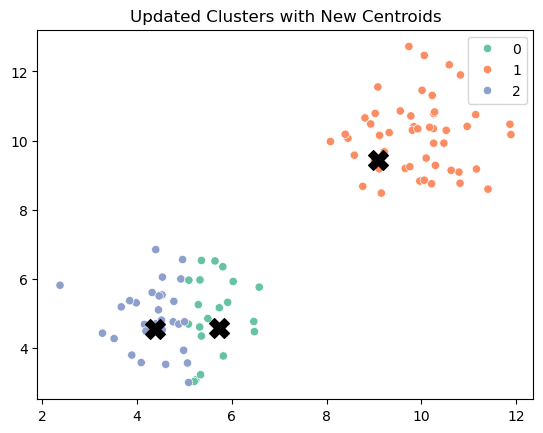

In [18]:
sns.scatterplot(x=data[:, 0],
                y=data[:, 1],
                hue=updated_assignments,
                palette='Set2')
plt.scatter(updated_centroids[:, 0],
            updated_centroids[:, 1],
            s=200,
            c='black',
            marker='X')
plt.title('Updated Clusters with New Centroids')

### Redraw the updated clusters showing the how the centroids have moved

Text(0.5, 1.0, 'Updated Clusters Showing Initial and Updated Centroids')

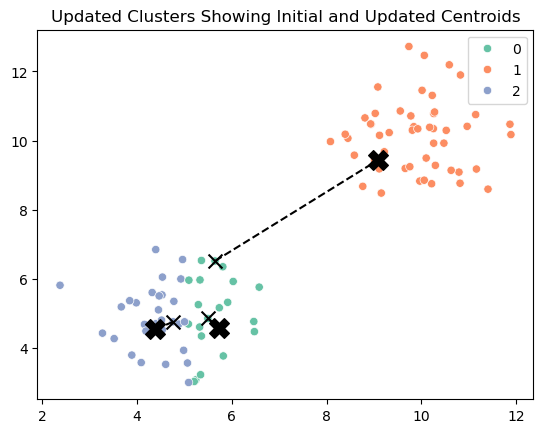

In [19]:
# Add the data and the updated centroids as before
sns.scatterplot(x=data[:, 0],
                y=data[:, 1],
                hue=updated_assignments,
                palette='Set2')
plt.scatter(updated_centroids[:, 0],
            updated_centroids[:, 1],
            s=200,
            c='black',
            marker='X')

# Add the initial centroids as well
plt.scatter(initial_centroids[:, 0],
            initial_centroids[:, 1],
            s=100,
            c='black',
            marker='x')

# Draw dashed lines from initial to updated centroids
for i in range(len(initial_centroids)):
    plt.plot([initial_centroids[i, 0], updated_centroids[i, 0]],
             [initial_centroids[i, 1], updated_centroids[i, 1]],
             'k--')

# Add the title
plt.title('Updated Clusters Showing Initial and Updated Centroids')

## Continue to update centroids and reassign points to clusters until there is no change
You can run the cell below more than once if the centroids are still converging on their final positions.

Text(0.5, 1.0, 'Updated Clusters with New Centroids')

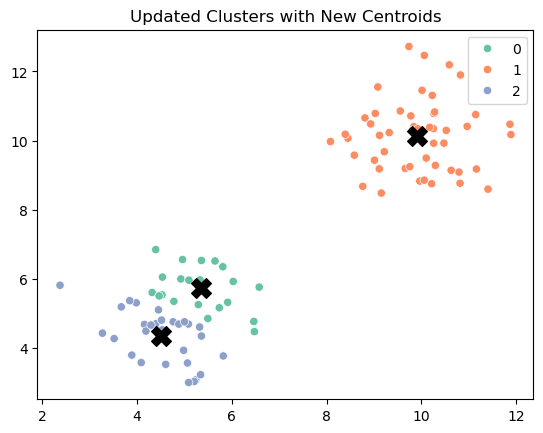

In [20]:
NUMBER_OF_ADDITIONAL_UPDATES = 10

for _ in range(NUMBER_OF_ADDITIONAL_UPDATES):
    # Update centroids and assignments again
    updated_centroids = update_centroids(data, updated_assignments, NUMBER_OF_CLUSTERS)
    updated_assignments = assign_clusters(data, updated_centroids)

# Visualize
sns.scatterplot(x=data[:, 0],
                y=data[:, 1],
                hue=updated_assignments,
                palette='Set2')
plt.scatter(updated_centroids[:, 0],
            updated_centroids[:, 1],
            s=200,
            c='black',
            marker='X')
plt.title('Updated Clusters with New Centroids')

## Evaluate the Resulting Clusters using Dunn Index
The Dunn Index is an approach to evaluating how well our data has been clustered. It tends to get higher when the distance between clusters increases, and also tends to get higher when clusters are more compact.

Dunn Index = min(distance between clusters) / max(cluster size)

There are different ways in which the terms of this equation can be defined (see https://en.wikipedia.org/wiki/Dunn_index). One implementation is given in the code below.


In [21]:
def calculate_inter_cluster_distances(data, unique_clusters, assignments):
    """Calculate inter-cluster distances (indicative of distance between clusters)"""
    inter_cluster_distances = []
    for k1 in range(len(unique_clusters)):
        for k2 in range(k1 + 1, len(unique_clusters)):
            cluster_k1_points = data[assignments == unique_clusters[k1]]
            cluster_k2_points = data[assignments == unique_clusters[k2]]
            distances = np.sqrt(((cluster_k1_points[:, np.newaxis] - cluster_k2_points) ** 2).sum(axis=2))
            inter_cluster_distances.append(np.min(distances))
    return inter_cluster_distances


def calculate_intra_cluster_distances(data, unique_clusters, assignments):
    """Calculate intra-cluster distances (indicative of cluster size)"""
    intra_cluster_distances = []
    for k in unique_clusters:
        cluster_points = data[assignments == k]
        if len(cluster_points) > 1:  # Ensure there are at least two points to compare
            distances = np.sqrt(((cluster_points[:, np.newaxis] - cluster_points) ** 2).sum(axis=2))
            intra_cluster_distances.append(np.max(distances))
        else:
            # No intra-cluster distance if cluster has only one point
            intra_cluster_distances.append(0)
    return intra_cluster_distances


def dunn_index(data, assignments):
    """Compute the Dunn Index"""
    unique_clusters = np.unique(assignments)
    inter_cluster_distances = calculate_inter_cluster_distances(data, unique_clusters, assignments)
    intra_cluster_distances = calculate_intra_cluster_distances(data, unique_clusters, assignments)

    if max(intra_cluster_distances) == 0:
        return 0  # Avoid division by zero
    else:
        return min(inter_cluster_distances) / max(intra_cluster_distances)

In [22]:
print("Dunn Index:", dunn_index(data, updated_assignments))

Dunn Index: 0.06773810326764207


## Using Scikit-Learn
Developing the code above from scratch is useful in terms of helping us to see how the algorithm works, but in a real project we'd normally want to reuse an existing robust implemention. Scikit-Learn provides the KMeans class which we demonstrate below.

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=NUMBER_OF_CLUSTERS, n_init='auto')
kmeans_assignments = kmeans.fit_predict(data)

kmeans_assignments

c:\Users\jmmck\anaconda3\envs\AI-ML-Bootcamp-24-25\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2])

In [25]:
print("Dunn Index:", dunn_index(data, kmeans_assignments))

Dunn Index: 0.07430356241681994


The the Dunn Index is slightly higher for the clustering produced by Scikit-Learn when NUMBER_OF_CLUSTERS is 3. This small difference might be explained by differences in the initial choice of centroids. Whereas the version of k-means that we built by hand just took the first datapoints as the initial centroids, Scikit-learn's KMeans uses a smart initialization method known as k-means++, which tends to find a better starting condition by spreading out the initial centroids. In other situations it might be less successful in its selection of initial centroids.

### Visualize the clusters created by KMeans

Text(0.5, 1.0, "Clusters created by Scikit-Learn's KMeans")

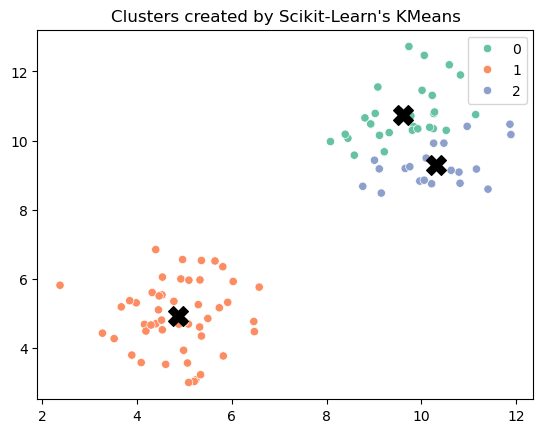

In [26]:
# Add the data points
sns.scatterplot(x=data[:, 0],
                y=data[:, 1],
                hue=kmeans_assignments,
                palette='Set2')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0],
            centroids[:, 1],
            s=200,
            c='black',
            marker='X')

# Add the title
plt.title("Clusters created by Scikit-Learn's KMeans")